#### Aquí encontrarás todo lo que necesitas saber: https://www.kaggle.com/t/ab8726f0cfc84544abbae69a6be88071

## Librerias

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import urllib.request
from PIL import Image

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, VotingClassifier, VotingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, roc_auc_score

## Data

In [2]:
### Para que funcione necesitas bajarte los archivos de datos de Kaggle 
train = pd.read_csv("data/train.csv")


## Data exploration

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73363 entries, 0 to 73362
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Id                                    73363 non-null  int64  
 1   target                                73363 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  73363 non-null  float64
 3   age                                   73363 non-null  object 
 4   NumberOfTime30-59DaysPastDueNotWorse  73363 non-null  int64  
 5   DebtRatio                             73363 non-null  float64
 6   MonthlyIncome                         58796 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       73363 non-null  int64  
 8   NumberOfTimes90DaysLate               73363 non-null  int64  
 9   NumberRealEstateLoansOrLines          73363 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  73363 non-null  int64  
 11  NumberOfDepende

In [4]:
train.head()

,Id,target,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,44164,0,0.768219,68y,1,0.687930,2178.0,12,0,1,0,0.0
1,95356,0,0.289873,52y,0,0.385497,3750.0,16,0,1,0,1.0
2,108917,0,0.000000,54y,0,0.346503,6833.0,8,0,1,0,0.0
3,99039,0,0.046064,66y,1,0.407614,5200.0,6,0,1,0,1.0
4,116168,0,0.168771,45y,0,4702.000000,NaN,10,0,3,0,1.0


In [5]:
train.describe()

,Id,target,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,73363.000000,73363.000000,73363.000000,73363.000000,73363.000000,5.879600e+04,73363.000000,73363.000000,73363.000000,73363.000000,71421.000000
mean,75035.459564,0.065919,5.884904,0.410507,359.752537,6.649145e+03,8.443916,0.256546,1.019928,0.231847,0.755506
std,43303.736606,0.248142,235.508449,4.090014,2477.648064,1.046163e+04,5.142232,4.066573,1.136357,4.052280,1.111715
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37449.000000,0.000000,0.029752,0.000000,0.173446,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75032.000000,0.000000,0.154688,0.000000,0.365737,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112628.500000,0.000000,0.558686,0.000000,0.863514,8.300000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,149998.000000,1.000000,29110.000000,98.000000,329664.000000,1.560100e+06,57.000000,98.000000,32.000000,98.000000,13.000000


In [6]:
train['MonthlyIncome'].mode()

0    5000.0
Name: MonthlyIncome, dtype: float64

## Data processing

In [3]:
train['age'] = train['age'].str.replace('y', ' ')
train['age'] = pd.to_numeric(train['age'])

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73363 entries, 0 to 73362
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Id                                    73363 non-null  int64  
 1   target                                73363 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  73363 non-null  float64
 3   age                                   73363 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  73363 non-null  int64  
 5   DebtRatio                             73363 non-null  float64
 6   MonthlyIncome                         58796 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       73363 non-null  int64  
 8   NumberOfTimes90DaysLate               73363 non-null  int64  
 9   NumberRealEstateLoansOrLines          73363 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  73363 non-null  int64  
 11  NumberOfDepende

In [9]:
train['target'].unique()

array([0, 1], dtype=int64)

In [4]:
train['NumberOfDependents'].fillna(train['NumberOfDependents'].median(), inplace=True)

In [5]:
train['MonthlyIncome'].fillna(train['MonthlyIncome'].median(), inplace=True)

In [12]:
train

,Id,target,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,44164,0,0.768219,68,1,0.687930,2178.0,12,0,1,0,0.0
1,95356,0,0.289873,52,0,0.385497,3750.0,16,0,1,0,1.0
2,108917,0,0.000000,54,0,0.346503,6833.0,8,0,1,0,0.0
3,99039,0,0.046064,66,1,0.407614,5200.0,6,0,1,0,1.0
4,116168,0,0.168771,45,0,4702.000000,5400.0,10,0,3,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
73358,25055,0,0.010468,45,0,0.211663,12500.0,15,0,1,0,3.0
73359,105554,0,0.131250,42,0,0.311538,5000.0,9,0,0,0,0.0
73360,129050,0,0.550527,59,0,2777.000000,5400.0,12,0,1,0,0.0
73361,94633,0,0.678651,31,0,0.436990,3800.0,12,0,1,0,0.0


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73363 entries, 0 to 73362
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Id                                    73363 non-null  int64  
 1   target                                73363 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  73363 non-null  float64
 3   age                                   73363 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  73363 non-null  int64  
 5   DebtRatio                             73363 non-null  float64
 6   MonthlyIncome                         73363 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       73363 non-null  int64  
 8   NumberOfTimes90DaysLate               73363 non-null  int64  
 9   NumberRealEstateLoansOrLines          73363 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  73363 non-null  int64  
 11  NumberOfDepende

-----------------------------------------------------------------------------------------------------------------

In [14]:
train['target'].value_counts()

target
0    68527
1     4836
Name: count, dtype: int64

c:\Users\taylo\Documents\GitHub\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\taylo\Documents\GitHub\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='target', ylabel='Count'>

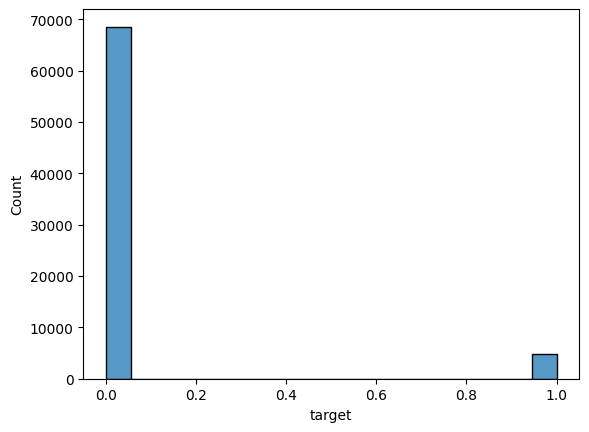

In [15]:
sns.histplot(train['target'])

In [16]:
train[train['target'] == 1]

,Id,target,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
8,72678,1,0.059577,56,3,0.667954,4658.0,16,0,3,0,0.0
31,136808,1,0.571385,46,0,0.436732,3500.0,21,1,1,0,2.0
47,9656,1,1.000000,47,0,27.000000,5400.0,0,1,0,0,0.0
64,65288,1,0.239389,61,0,2.838054,3000.0,13,0,5,0,0.0
67,76444,1,0.520909,29,0,0.295124,2747.0,12,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
73265,92749,1,1.383234,33,1,0.194369,1100.0,6,0,0,2,2.0
73274,108659,1,1.000000,58,0,0.004062,3692.0,0,0,0,0,3.0
73275,8652,1,0.837785,63,0,0.653739,6471.0,10,0,1,0,0.0
73328,39234,1,1.108255,29,2,0.255562,3505.0,5,4,0,1,2.0


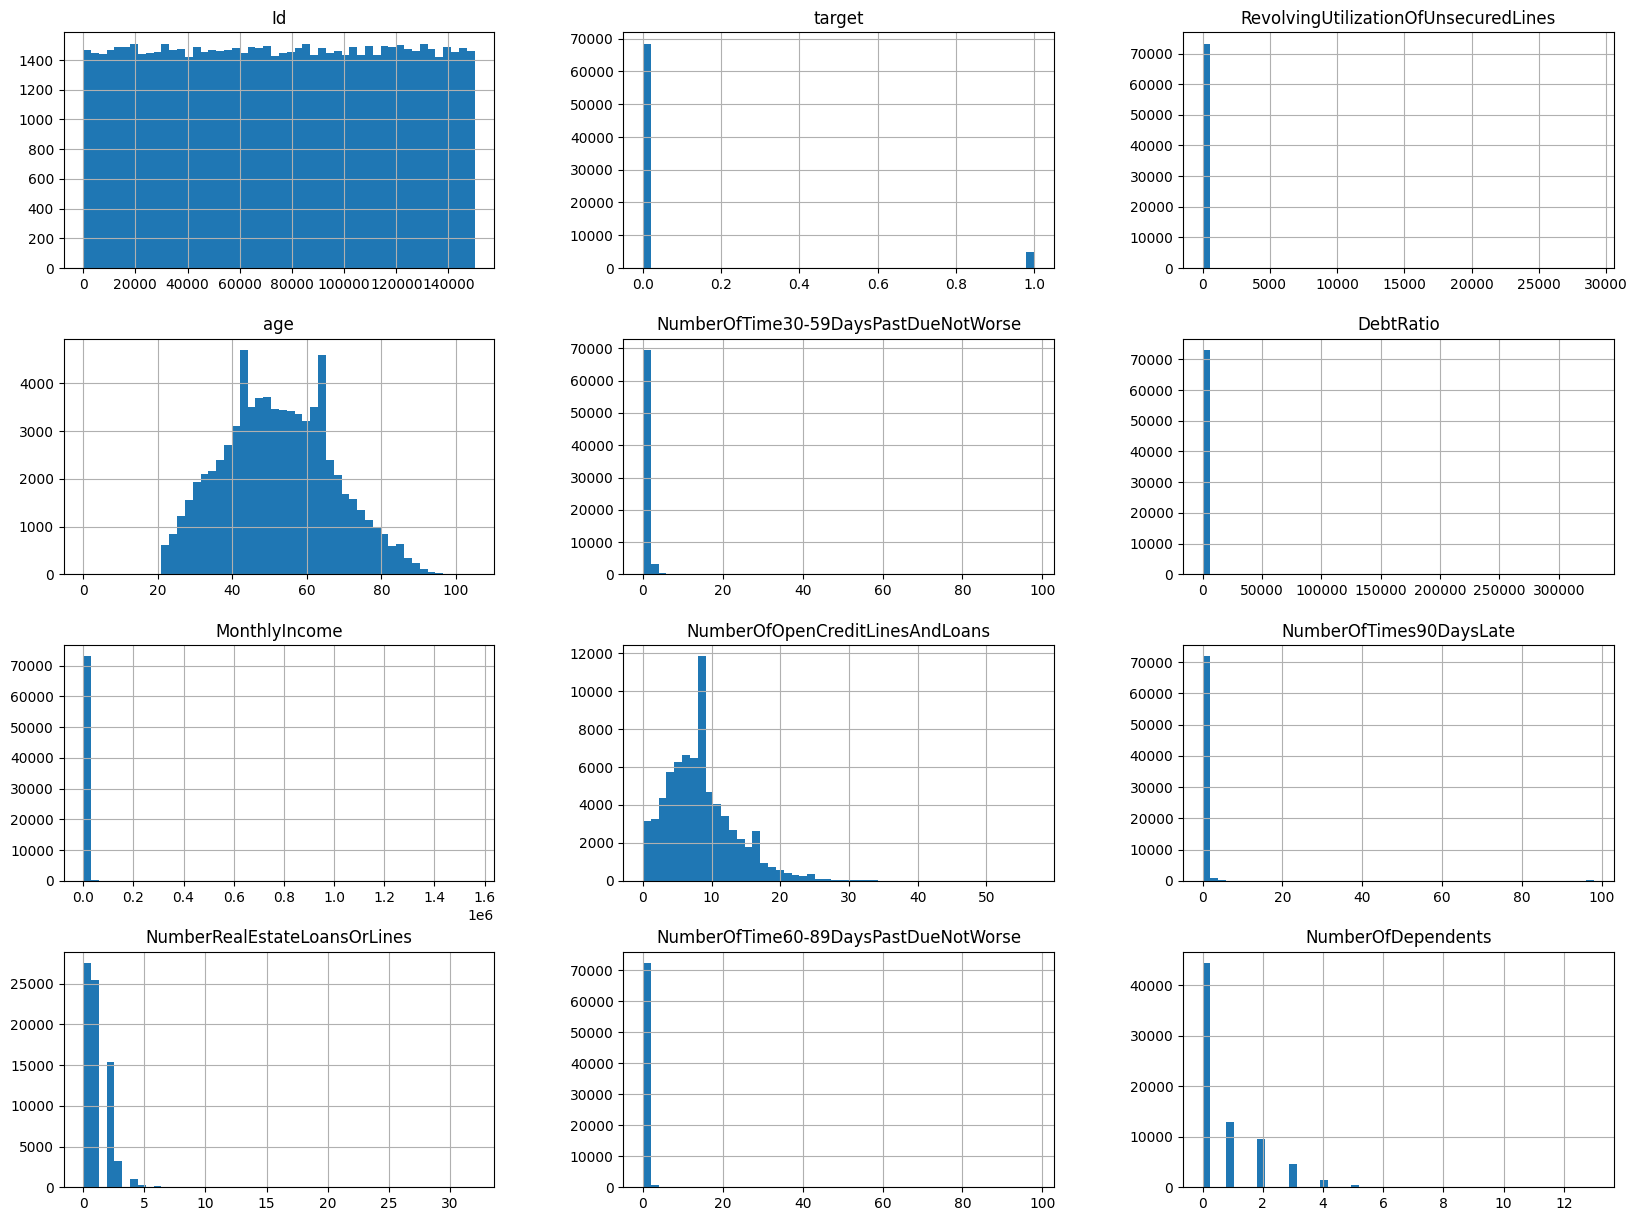

In [17]:
train.hist(bins=50, figsize=(20, 15))
plt.show()

## Pasos que si o si debéis realizar para poder participar en la competición:

### 1. Definir X e y

In [6]:
X = train.drop(["target"], axis=1)
y = train["target"]

### 2. Dividir X_train, X_test, y_train, y_test

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

### 3. Asignar el modelo (vacío) a una variable


In [8]:
rfr = RandomForestRegressor()

In [23]:
modelos = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Decission Tree Classifier": DecisionTreeClassifier(),
    "SVC": SVC(),
}

# Define las métricas a usar
metricas = ["accuracy", "roc_auc"]

resultados_dict = {}

for nombre_modelo, modelo in modelos.items():
    cv_resultados = cross_validate(modelo, X_train, y_train, cv=5, scoring=metricas)
    
    for metrica in metricas:
        clave = f"{nombre_modelo}_{metrica}"
        resultados_dict[clave] = cv_resultados[f"test_{metrica}"].mean()

# Convertir el diccionario de resultados en DataFrame
resultados_df = pd.DataFrame([resultados_dict])

resultados_df.T

c:\Users\taylo\Documents\GitHub\DS_PT_09_2023\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,0
Logistic Regression_accuracy,0.933515
Logistic Regression_roc_auc,0.648149
Random Forest Classifier_accuracy,0.936071
Random Forest Classifier_roc_auc,0.842702
Decission Tree Classifier_accuracy,0.898501
Decission Tree Classifier_roc_auc,0.612011
SVC_accuracy,0.933498
SVC_roc_auc,0.485118


### 4. Sacar métricas, valorar el modelo 

Recuerda que en la competición se va a evaluar con la métrica de AUC.

In [ ]:
metrica = roc_auc_score

-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir con el dataset de predicción 

Definición de **modelo que está listo**. 

Tras hacer suficientes pruebas, analizar los datos, hacer feature engineering, probar diferentes modelos con diferentes parámetros, es con este con el que observo mejores métricas y menos overfitting. ¡Cuidado con el overfitting aquí! Si vuestro modelo aprende muy bien de estos datos pero hay overfitting cuando le pasemos los datos desconocidos de `test.csv` nos arriesgamos a que digamos, no salga lo esperado.

### 1. Entrena dicho modelo con TODOS tus datos de train, esto es con `train.csv` al completo.


**CON LAS TRANSFORMACIONES QUE LE HAYAS REALIZADO A `X` INCLUÍDAS.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

In [9]:
rfr = RandomForestClassifier()
rfr.fit(X_train, y_train)
X_pred_train = rfr.predict(X_train)

In [10]:
y_test

3350     0
23974    0
61071    0
18386    0
11705    1
        ..
18775    0
41416    0
51009    0
23468    0
51442    0
Name: target, Length: 14673, dtype: int64

In [35]:
X_pred_train

array([0.03, 0.02, 0.11, ..., 0.1 , 0.  , 0.06])

### 2. Carga los datos de `test.csv` para predecir.

In [11]:
X_pred = pd.read_csv("data/test.csv")
X_pred.head()

,Id,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,15576,0.051782,53y,0,0.009350,2245.0,3,0,0,0,0.0
1,94308,0.022133,57y,0,0.319562,7672.0,26,0,1,0,2.0
2,53983,0.013693,68y,0,0.139237,4064.0,4,0,0,0,1.0
3,61359,0.018568,74y,0,0.018760,10500.0,27,0,0,0,0.0
4,71383,0.008630,66y,0,9.000000,NaN,5,0,0,0,0.0


In [12]:
X_pred['age'] = X_pred['age'].str.replace('y', ' ')
X_pred['age'] = pd.to_numeric(X_pred['age'])

X_pred['NumberOfDependents'].fillna(X_pred['NumberOfDependents'].median(), inplace=True)

X_pred['MonthlyIncome'].fillna(X_pred['MonthlyIncome'].median(), inplace=True)

In [13]:
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31442 entries, 0 to 31441
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Id                                    31442 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  31442 non-null  float64
 2   age                                   31442 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  31442 non-null  int64  
 4   DebtRatio                             31442 non-null  float64
 5   MonthlyIncome                         31442 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       31442 non-null  int64  
 7   NumberOfTimes90DaysLate               31442 non-null  int64  
 8   NumberRealEstateLoansOrLines          31442 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  31442 non-null  int64  
 10  NumberOfDependents                    31442 non-null  float64
dtypes: float64(4), 

IMPORTANTE: APLICAR LO MISMO A ESTOS DATOS QUE HAYÁIS APLICADO A LOS DATOS DE ENTRENAMIENTO

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO BORRAR FILAS, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER 391 FILAS, SI O SI

**Entonces, si al cargar los datos de train usé `index_col=0` para que utilizara la primera columna del conjunto de datos como índice, ¿tendré que hacerlo también para el conjunto `test.csv`?**

In [ ]:
# ¿Qué opináis?
# Sí

![](https://www.tierraljelechu.com/web/img/wiki_up/1.996-SorpresaDto.-1-Red.jpg)

### 3. AHORA puedo hacer la predicción que será lo que subirás a Kaggle. 

**¿Qué es lo que subirás a Kaggle?**

In [14]:
predictions_submit = rfr.predict(X_pred)
predictions_submit

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
train['target'].value_counts(normalize=True)

target
0    0.934081
1    0.065919
Name: proportion, dtype: float64

In [26]:
pd.DataFrame(predictions_submit).value_counts(normalize=True)

0    0.978659
1    0.021341
Name: proportion, dtype: float64

**¡PERO! Para subir a Kaggle la predicción, ésta tendrá que tener una forma específica y no valdrá otra.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [27]:
sample = pd.read_csv("data/sample_submission.csv")

In [28]:
sample.head()

,Id,target
0,15576,0
1,94308,1
2,53983,1
3,61359,1
4,71383,0


In [29]:
sample.shape

(31442, 2)

### 4. Mete tus predicciones en un dataframe. 

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [31]:
submission = pd.DataFrame({"Id": sample['Id'], "target": predictions_submit})

In [32]:
submission.head()

,Id,target
0,15576,0
1,94308,0
2,53983,0
3,61359,0
4,71383,0


In [33]:
submission.shape

(31442, 2)

### 5. Pásale el CHEQUEATOR para comprobar que efectivamente está listo para subir a Kaggle.

In [34]:
def chequeator(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.Id.all() == sample.Id.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto de Clara: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `diamonds_test.csv`. Lloro.")


In [35]:
chequeator(submission)

You're ready to submit!


In [36]:
submission.()

Id      target
1       0         1
99862   0         1
99859   0         1
99857   0         1
99855   0         1
                 ..
49824   0         1
49823   0         1
49814   0         1
49803   0         1
149999  0         1
Name: count, Length: 31442, dtype: int64